In [1]:
#Importing important libraries

import pandas as pd
import os

In [2]:
#Merging 12 months of sales data into one csv file

files = [file for file in os.listdir('E:\Data Analysis\Python\Electic Store Sales Analysis\Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("E:\Data Analysis\Python\Electic Store Sales Analysis\Sales_Data\\" + file)
    all_months_data = pd.concat([all_months_data,df])

all_months_data.to_csv("all_data.csv", index = False)

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
# cleaning nan values
all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# Extracting month from order date column

# Convert "Order Date" column to datetime format
try:
    all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
    all_data['Month'] = all_data['Order Date'].dt.month
except ValueError:
    all_data = all_data[all_data['Order Date'] != 'Order Date']
    all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
    all_data['Month'] = all_data['Order Date'].dt.month




In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  object        
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.3+ MB


In [8]:
# correcting datatype
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])



In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 11.3+ MB


In [10]:
# Sales calculation
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
# extracting city from the Purchase Address

all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1].strip() + ' (' + x.split(',')[2].split(' ')[1] + ')')

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Q1 : what was the best month for sales?

In [12]:
results = all_data.groupby('Month').sum()
results


C:\Users\shant\AppData\Local\Temp\ipykernel_10764\4168659827.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


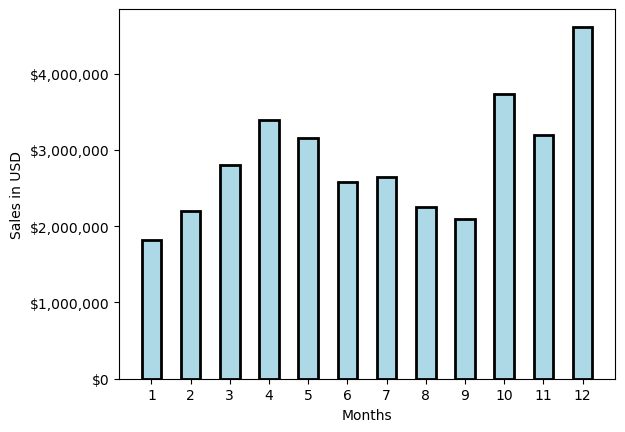

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

months = range(1,13)

plt.bar(months, results['Sales'],  width=0.5, linewidth=2, edgecolor='black', color='lightblue')
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')

# Formatting the y-axis ticker
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()


### Seeing the barchart, it is clear that December was the best month for sales

In [27]:
results_city = all_data.groupby('City').sum()
results_city

C:\Users\shant\AppData\Local\Temp\ipykernel_10764\2659747692.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_city = all_data.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


### Q2: which city had the highest number of sales?

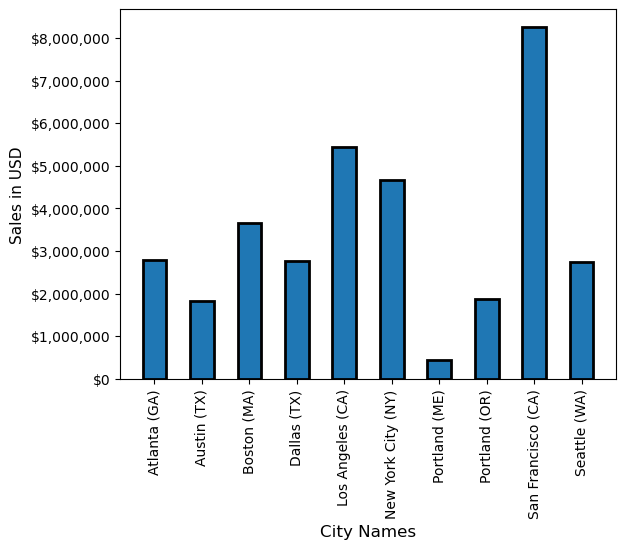

In [44]:

cities = results_city.index
plt.bar(cities, results_city['Sales'],  width=0.5, linewidth=2, edgecolor='black')
plt.xticks(cities, rotation = 'vertical')
plt.xlabel('City Names', size = 12)
plt.ylabel('Sales in USD', size = 11)

#Formatting the y-axis ticker
formatter = mtick.StrMethodFormatter('${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()



### San Francisco had the highest number of sales

### Q3 : what is the best time for advertisement?

In [39]:
# extracting hour from order date
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


In [40]:
results_hour = all_data.groupby('Hour').sum()
results_hour

C:\Users\shant\AppData\Local\Temp\ipykernel_10764\107685656.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_hour = all_data.groupby('Hour').sum()


,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


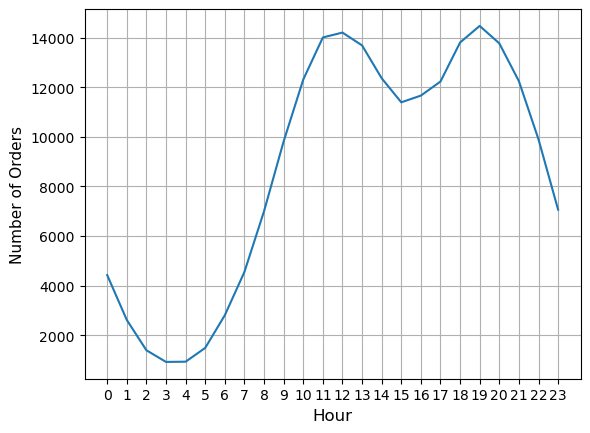

In [41]:
hour = results_hour.index
plt.plot(hour, results_hour['Quantity Ordered'])
plt.xticks(hour)
plt.grid()
plt.xlabel('Hour', size = 12)
plt.ylabel('Number of Orders', size = 11)
plt.show()



### Q4 : which products are mostly sold together?

In [54]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head()

C:\Users\shant\AppData\Local\Temp\ipykernel_10764\1328026759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [55]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [56]:
count = df['Grouped'].value_counts().sort_values(ascending = False)

count.head()

iPhone,Lightning Charging Cable         882
Google Phone,USB-C Charging Cable       856
iPhone,Wired Headphones                 361
Vareebadd Phone,USB-C Charging Cable    312
Google Phone,Wired Headphones           303
Name: Grouped, dtype: int64

### Q5 : Most Sold Products

In [57]:
results_product = all_data.groupby('Product').sum()
results_product

C:\Users\shant\AppData\Local\Temp\ipykernel_10764\1518312968.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results_product = all_data.groupby('Product').sum()


,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


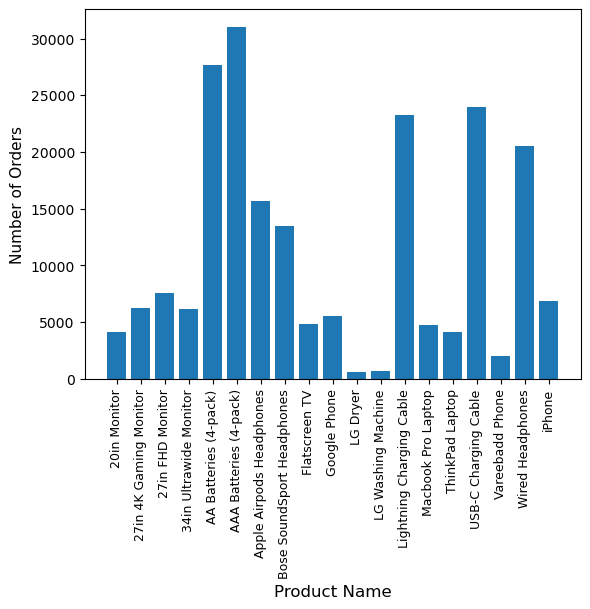

In [58]:
plt.bar(results_product.index, results_product['Quantity Ordered'])
plt.xticks(results_product.index,rotation = 'vertical',size = 9)
plt.xlabel('Product Name', size = 12)
plt.ylabel('Number of Orders', size = 11)
plt.show()

C:\Users\shant\AppData\Local\Temp\ipykernel_10764\2631486688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
C:\Users\shant\AppData\Local\Temp\ipykernel_10764\2631486688.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(results_product.index, rotation='vertical', size=8)
C:\Users\shant\AppData\Local\Temp\ipykernel_10764\2631486688.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


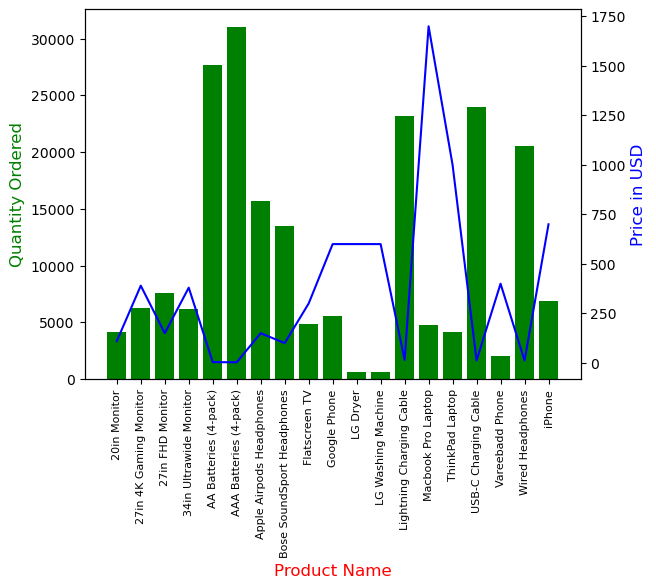

In [60]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(results_product.index, results_product['Quantity Ordered'], color='g')
ax2.plot(results_product.index, prices, color='b')

ax1.set_xlabel('Product Name', color = 'r',size =12)
ax1.set_ylabel('Quantity Ordered', color='g',size =12)
ax2.set_ylabel('Price in USD', color='b',size = 12)
ax1.set_xticklabels(results_product.index, rotation='vertical', size=8)

fig.show()